In [3]:
import pandas as pd
import numpy as np

In [4]:
test ='''498,4 -> 498,6 -> 496,6
503,4 -> 502,4 -> 502,9 -> 494,9'''

vals = []
for line in test.split('\n'):
    vals.append(line.strip())

vals[:5]


['498,4 -> 498,6 -> 496,6', '503,4 -> 502,4 -> 502,9 -> 494,9']

In [8]:
vals = []
with open('./input.txt', 'r') as file:
    for line in file:
        vals.append(line.strip())
        
vals[:5]

['521,154 -> 526,154',
 '474,44 -> 474,38 -> 474,44 -> 476,44 -> 476,39 -> 476,44 -> 478,44 -> 478,34 -> 478,44 -> 480,44 -> 480,40 -> 480,44 -> 482,44 -> 482,36 -> 482,44 -> 484,44 -> 484,34 -> 484,44 -> 486,44 -> 486,38 -> 486,44 -> 488,44 -> 488,36 -> 488,44 -> 490,44 -> 490,36 -> 490,44',
 '499,13 -> 499,17 -> 493,17 -> 493,24 -> 507,24 -> 507,17 -> 501,17 -> 501,13',
 '497,80 -> 497,83 -> 489,83 -> 489,87 -> 505,87 -> 505,83 -> 501,83 -> 501,80',
 '471,77 -> 475,77']

(167.0, 0.0)

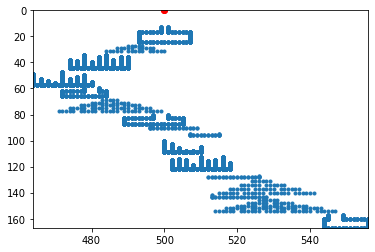

In [9]:

filled_x = np.array([])
filled_y = np.array([])
for v in vals:
    x,y = [], []
    for coords in v.split(' -> '):
        temp_x,temp_y = coords.split(',')
        x.append(int(temp_x))
        y.append(int(temp_y))
    for i, (X,Y) in enumerate(zip(x[:-1],y[:-1])):
        min_x = np.min([x[i],x[i+1]])
        max_x = np.max([x[i],x[i+1]])

        min_y = np.min([y[i],y[i+1]])
        max_y = np.max([y[i],y[i+1]])
     
        if min_x==max_x:
            filled_x = np.concatenate([filled_x, [min_x]*(max_y-min_y+1)])    
            filled_y = np.concatenate([filled_y, np.arange(min_y,max_y+1)])    
            
        elif min_y==max_y:
            filled_y = np.concatenate([filled_y, [min_y]*(max_x-min_x+1)])
            filled_x = np.concatenate([filled_x, np.arange(min_x,max_x+1)])
            
        else:
            filled_x = np.concatenate([filled_x, np.arange(min_x,max_x+1)])
            filled_y = np.concatenate([filled_y, np.arange(min_y,max_y+1)])    
            
        assert len(filled_x)==len(filled_y)
            
min_x, max_x, min_y, max_y = np.min(filled_x), np.max(filled_x), np.min(filled_y), np.max(filled_y)

landscape = np.zeros((int(max_x)+500, int(max_y)+3), dtype=int)
for x,y in zip(filled_x, filled_y):
    landscape[int(x),int(y)] = 1
    
import matplotlib.pyplot as plt

plt.scatter(x=filled_x, y=filled_y, marker='.')
plt.scatter(x=[500,500], y=[0,0], marker='o', c='r')
plt.xlim(min_x,max_x)
plt.ylim(max_y,0)

(462.0, 558.0)

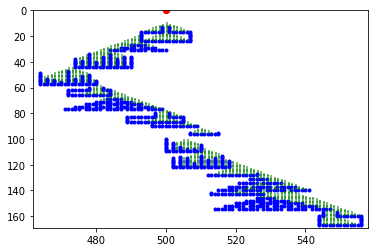

In [10]:

counter = 0
winning = False

while not winning:
    counter += 1
    falling_sand = [500,0]
    sand='falling'
    while not winning and sand=='falling':
        if landscape[falling_sand[0],falling_sand[1]+1] == 0:
            falling_sand[1] += 1
        elif landscape[falling_sand[0]-1,falling_sand[1]+1] == 0:
            falling_sand[0] -= 1
            falling_sand[1] += 1
        elif landscape[falling_sand[0]+1,falling_sand[1]+1] == 0:
            falling_sand[0] += 1
            falling_sand[1] += 1    
        else:
            landscape[falling_sand[0],falling_sand[1]] = -1
            sand='not_falling'

        if falling_sand[0] < min_x or falling_sand[0]> max_x:
            winning = True
            
counter - 1
soil = np.argwhere(landscape==1)
sand = np.argwhere(landscape==-1)

plt.scatter(soil[...,0],soil[...,1], marker='.',c='b')
plt.scatter(sand[...,0],sand[...,1], marker=',',c='g', alpha=0.5, s=1)
plt.scatter(x=[500,500], y=[0,0], marker='o', c='r')
plt.ylim(max_y+2,0)
plt.xlim(min_x-2,max_x+2)

25289

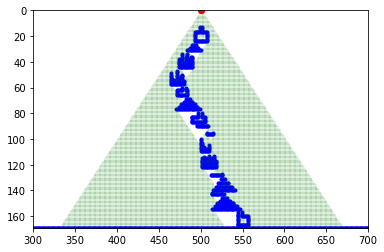

In [11]:
landscape[:,int(max_y)+2] = 1


counter = 0
winning = False

while not winning:
    counter += 1
    falling_sand = [500,0]
    sand='falling'
    while not winning and sand=='falling':
        if landscape[falling_sand[0],falling_sand[1]+1] == 0:
            falling_sand[1] += 1
        elif landscape[falling_sand[0]-1,falling_sand[1]+1] == 0:
            falling_sand[0] -= 1
            falling_sand[1] += 1
        elif landscape[falling_sand[0]+1,falling_sand[1]+1] == 0:
            falling_sand[0] += 1
            falling_sand[1] += 1    
        else:
            landscape[falling_sand[0],falling_sand[1]] = -1
            sand='not_falling'

        if falling_sand[0] == 500 and falling_sand[1]==0:
            winning = True

            
soil = np.argwhere(landscape==1)
sand = np.argwhere(landscape==-1)

plt.scatter(soil[...,0],soil[...,1], marker='.',c='b')
plt.scatter(sand[...,0],sand[...,1], marker=',',c='g', alpha=0.05, s=1)
plt.scatter(x=[500,500], y=[0,0], marker='o', c='r')
plt.ylim(max_y+2,0)
plt.xlim(300,700)            
counter